### Import Libraries ###

In [1]:
import os
import json
import csv
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

## Blake's code to see frame by frame ##

#### Body Position Info function ####

In [2]:
def get_body_position_info(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    people= []

    for i,person in enumerate(j):
        #Set up list to collect person's body location
        person_i = []
        count = 0

        #add each body part position to the list
        for body_part in person:
            count+=1
            if count == 1: continue
            else: person_i.append(body_part[1])

        #Append entire list to list of people
        people.append(person_i)

    return people


def get_body_part_labels(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    body_part_labels= []
   
    for i,body_part in enumerate(j[0]):
            if i == 0: continue
            else: body_part_labels.append(body_part[0])

    return body_part_labels


In [3]:
body_part_labels = get_body_part_labels('./densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
people = get_body_position_info('./densepose/txt/ballet/-5Yp-vToI2E_016_0002.json')
people[0]

[[417.4290771484375, 171.84947204589844],
 [429.3904113769531, 162.8577117919922],
 [417.4290771484375, 162.8577117919922],
 [457.3002014160156, 176.84487915039062],
 [416.4322814941406, 173.84762573242188],
 [494.1809997558594, 236.78988647460938],
 [404.470947265625, 233.79263305664062],
 [561.9619140625, 295.7358093261719],
 [358.619140625, 271.7578125],
 [480.2261047363281, 319.71380615234375],
 [432.3807373046875, 304.7275695800781],
 [483.2164306640625, 354.6817321777344],
 [425.4032897949219, 353.6826477050781],
 [520.0972290039062, 433.6093444824219],
 [368.5869140625, 451.59283447265625],
 [494.1809997558594, 578.4764404296875],
 [426.4000549316406, 537.5140380859375]]

In [4]:
#Hardcode dictionary of connections:
connections_dict = {}
connections_dict['left_shoulder'] = 'left_elbow'
connections_dict['left_elbow'] = 'left_wrist'
connections_dict['left_hip'] = 'left_knee'
connections_dict['left_knee'] = 'left_ankle'
connections_dict['right_shoulder'] = 'right_elbow'
connections_dict['right_elbow'] = 'right_wrist'
connections_dict['right_hip'] = 'right_knee'
connections_dict['right_knee'] = 'right_ankle'
connections_dict['left_ear'] = 'left_eye'
connections_dict['left_eye'] = 'nose'
connections_dict['nose'] = 'right_eye'
connections_dict['right_eye'] = 'right_ear'

In [5]:
#Create body part index dictionary for easy acces to index of each body part
body_part_indx_dict = {}
indexes = list(range(len(body_part_labels)))
for i in range(len(body_part_labels)):
    body_part_indx_dict[body_part_labels[i]] = indexes[i]

body_part_indx_dict

{'nose': 0,
 'left_eye': 1,
 'right_eye': 2,
 'left_ear': 3,
 'right_ear': 4,
 'left_shoulder': 5,
 'right_shoulder': 6,
 'left_elbow': 7,
 'right_elbow': 8,
 'left_wrist': 9,
 'right_wrist': 10,
 'left_hip': 11,
 'right_hip': 12,
 'left_knee': 13,
 'right_knee': 14,
 'left_ankle': 15,
 'right_ankle': 16}

#### Plot Body Positions function ####

In [6]:
def plot_body_positions(list_of_people, figsize = (8,4)):
    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap('tab10').colors*2 #*2 for when there's >10 ppl/image
    #cmap = cmap + cmap # Get the tab10 colormap
    for i,person in enumerate(list_of_people):
        #separate x and y information into lists
        x_values = [point[0] for point in person]
        y_values = [point[1] for point in person]
        y_values = [800 - i for i in y_values] #Invert x due to skeleton data structure

        #Plot the connections between joints
        for k,v in connections_dict.items():
            temp_x = [x_values[body_part_indx_dict[k]], x_values[body_part_indx_dict[v]]]
            temp_y = [y_values[body_part_indx_dict[k]], y_values[body_part_indx_dict[v]]]
            plt.plot(temp_x, temp_y, linewidth = 4, color = cmap[i])

        #Plot the scatter data and label figure
        plt.scatter(x_values, y_values, label=f'Person {i}', color = cmap[i])
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.title('Scatter plot of body positions in X-Y space')
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.show()

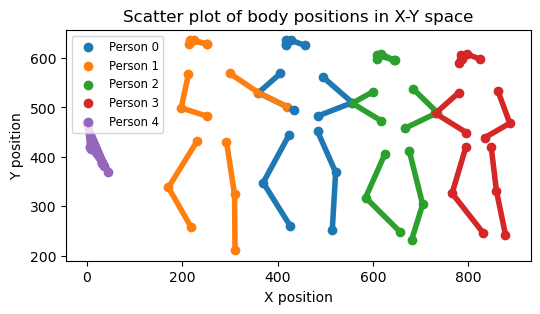

In [7]:
people = get_body_position_info('./densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
plot_body_positions(people, figsize=(6,3))

#### Test Multiple Frames ####

In [8]:
directory = './densepose/txt'

#get directories without hidden files
directories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
directories.sort()

#Setup dictionary to collect file names
all_file_names = {}

#Identify all file names
for d in directories:
    #get file names without hidden files
    files = [f for f in os.listdir(os.path.join(directory, d)) if os.path.isfile(os.path.join(directory, d, f))]
    files.sort()
    all_file_names[d] = files

In [9]:
first_img_indexes = {}

for d in directories:
    num_images = len(all_file_names[d])
    img_count = 0
    first_images = []
    for i in range(num_images):
        if all_file_names[d][i].split('.')[0].split('_')[-1] == '0001':
            first_images.append(img_count)
            #img_count = 0
        img_count += 1
    first_img_indexes[d] = first_images

all_file_names['ballet'][386]

'0aUhNK8tJPU_035_0001.json'

Filename: -5Yp-vToI2E_016_0001.json


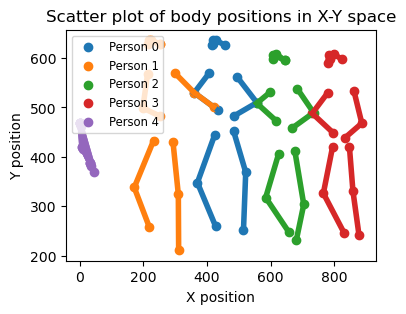

Filename: -5Yp-vToI2E_016_0002.json


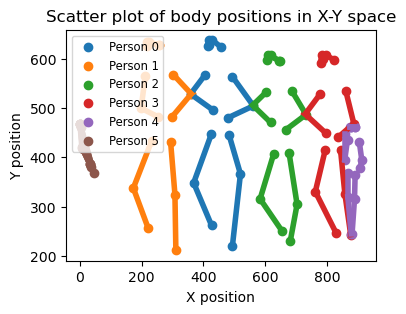

Filename: -5Yp-vToI2E_016_0003.json


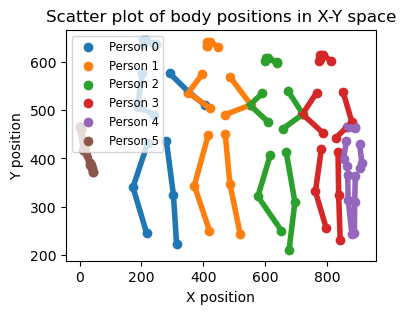

Filename: -5Yp-vToI2E_016_0004.json


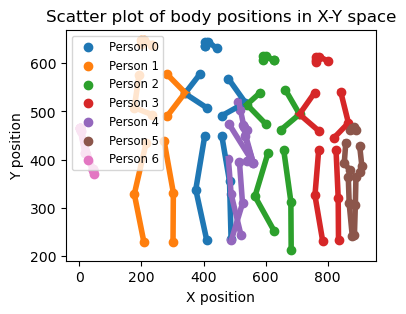

Filename: -5Yp-vToI2E_016_0005.json


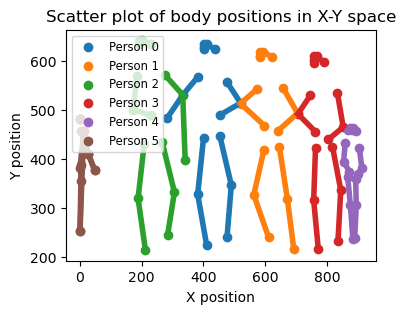

In [10]:
#Explore preliminary data
dance_type = 'ballet'

#Collect files names from specific video
video_num = 0 #Starts counting with 0
start = first_img_indexes[dance_type][video_num]
stop = first_img_indexes[dance_type][video_num + 1]
file_names = all_file_names[dance_type][start:stop]

#Plot the frames
for file in file_names[0:5]:
    print(f'Filename: {file}')
    file_path = os.path.join(directory, dance_type, file)
    people = get_body_position_info(file_path)
    plot_body_positions(people, figsize = (4,3))

## Testing Function to Swap People ##

#### Checking JSON file ####

In [11]:
# Load the JSON file
with open('./densepose/txt/ballet/-5Yp-vToI2E_016_0001.json', 'r') as f:
    dataset = json.load(f)

In [12]:
for person in dataset:
    print(person)


['person0', ['nose', [417.8628845214844, 172.3057403564453]], ['left_eye', [428.8619079589844, 164.3126220703125]], ['right_eye', [417.8628845214844, 164.3126220703125]], ['left_ear', [456.8594665527344, 174.30401611328125]], ['right_ear', [416.8629455566406, 173.3048858642578]], ['left_shoulder', [494.85614013671875, 238.2489471435547]], ['right_shoulder', [405.8639221191406, 231.25497436523438]], ['left_elbow', [556.8507080078125, 290.2041931152344]], ['right_elbow', [359.8679504394531, 270.2214050292969]], ['left_wrist', [484.85699462890625, 317.18096923828125]], ['right_wrist', [433.8614807128906, 305.1912841796875]], ['left_hip', [483.8570861816406, 348.154296875]], ['right_hip', [423.8623352050781, 356.14739990234375]], ['left_knee', [521.853759765625, 431.0828857421875]], ['right_knee', [369.8670654296875, 452.0647888183594]], ['left_ankle', [514.8543701171875, 546.9830322265625]], ['right_ankle', [426.8620910644531, 539.9890747070312]]]
['person1', ['nose', [214.0703125, 171.00

#### Distance Formula ####

In [13]:
def closest_distance(point1, point2):
    cd = np.linalg.norm(point1 - point2)
    return cd

#### Find Closest Person function ####

In [14]:
def find_closest_person(previous_data, current_data):

    ## starting with first person from next file
    for c_person in current_data:
        new_person = ''
        min_distance = float('inf')
        cr_right_hip = None
        cr_left_hip = None

        ## gather coordinates of both right & left hip (current file)
        for part in c_person:
            if part[0] == 'right_hip':
                cr_right_hip = np.array(part[1])
            elif part[0] == 'left_hip':
                cr_left_hip = np.array(part[1])

        ## looping through each person from previous file
        for p_person in previous_data:
            pv_right_hip = None
            pv_left_hip = None

            ## gathering coordinates of both right & left hip (previous file)
            for part in p_person:
                if part[0] == 'right_hip':
                    pv_right_hip = np.array(part[1])
                elif part[0] == 'left_hip':
                    pv_left_hip = np.array(part[1])
            
            if cr_right_hip is not None and cr_left_hip is not None and pv_right_hip is not None and pv_left_hip is not None:
                distance = closest_distance(cr_right_hip, pv_right_hip) + closest_distance(cr_left_hip, pv_left_hip)

            ## finding which person has minimum distance
            if distance < min_distance:
                min_distance = distance
                new_person = p_person[0]

        ## assigning new person to current data
        c_person[0] = new_person


### TESTING function ###

#### load current & previous data ####

In [15]:
# Load the JSON file
with open('./densepose/txt/ballet/-5Yp-vToI2E_016_0003.json', 'r') as f:
    curr_data = json.load(f)

In [16]:
# Load the JSON file
with open('./densepose/txt/ballet/-5Yp-vToI2E_016_0002.json', 'r') as f:
    prev_data = json.load(f)

In [17]:
for person in curr_data:
    print(person[0])

person0
person1
person2
person3
person4
person5


In [18]:
for person in prev_data:
    print(person)

['person0', ['nose', [417.4290771484375, 171.84947204589844]], ['left_eye', [429.3904113769531, 162.8577117919922]], ['right_eye', [417.4290771484375, 162.8577117919922]], ['left_ear', [457.3002014160156, 176.84487915039062]], ['right_ear', [416.4322814941406, 173.84762573242188]], ['left_shoulder', [494.1809997558594, 236.78988647460938]], ['right_shoulder', [404.470947265625, 233.79263305664062]], ['left_elbow', [561.9619140625, 295.7358093261719]], ['right_elbow', [358.619140625, 271.7578125]], ['left_wrist', [480.2261047363281, 319.71380615234375]], ['right_wrist', [432.3807373046875, 304.7275695800781]], ['left_hip', [483.2164306640625, 354.6817321777344]], ['right_hip', [425.4032897949219, 353.6826477050781]], ['left_knee', [520.0972290039062, 433.6093444824219]], ['right_knee', [368.5869140625, 451.59283447265625]], ['left_ankle', [494.1809997558594, 578.4764404296875]], ['right_ankle', [426.4000549316406, 537.5140380859375]]]
['person1', ['nose', [216.15411376953125, 173.709030

#### testing function ####

In [19]:
## print statement is for print each step in iteration

## starting with first person from next file
for c_person in curr_data:
    new_person = ''
    min_distance = float('inf')
    cr_right_hip = None
    cr_left_hip = None
    print('############################################')
    print('TESTING PERSON: ', c_person[0])
    print('############################################')

    ## gather coordinates of both right & left hip (current file)
    for part in c_person:
        if part[0] == 'right_hip':
            cr_right_hip = np.array(part[1])
        elif part[0] == 'left_hip':
            cr_left_hip = np.array(part[1])

    ## looping through each person from previous file
    for p_person in prev_data:
        pv_right_hip = None
        pv_left_hip = None
        print('COMPARING TESTING PERSON TO: ', p_person[0])

        ## gathering coordinates of both right & left hip (previous file)
        for part in p_person:
            if part[0] == 'right_hip':
                pv_right_hip = np.array(part[1])
            elif part[0] == 'left_hip':
                pv_left_hip = np.array(part[1])
            
        if cr_right_hip is not None and cr_left_hip is not None and pv_right_hip is not None and pv_left_hip is not None:
            distance = closest_distance(cr_right_hip, pv_right_hip) + closest_distance(cr_left_hip, pv_left_hip)

        print('DISTANCE BETWEEN: ', distance)

        ## finding which person has minimum distance
        if distance < min_distance:
            min_distance = distance
            new_person = p_person[0]

        print('CLOSEST PERSON: ', new_person)
        print('-----------------------')

    ## assigning new person to current data
    c_person[0] = new_person



############################################
TESTING PERSON:  person0
############################################
COMPARING TESTING PERSON TO:  person0
DISTANCE BETWEEN:  408.5701748375832
CLOSEST PERSON:  person0
-----------------------
COMPARING TESTING PERSON TO:  person1
DISTANCE BETWEEN:  26.780802889360775
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person2
DISTANCE BETWEEN:  806.3120667687624
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person3
DISTANCE BETWEEN:  1138.745386096233
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person4
DISTANCE BETWEEN:  1265.9864386293166
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person5
DISTANCE BETWEEN:  504.05154363357474
CLOSEST PERSON:  person1
-----------------------
############################################
TESTING PERSON:  person1
############################################
COMPARING TESTING PERSO

#### comparing new updated data ####

In [20]:
for person in curr_data:
    print(person)

['person1', ['nose', [206.48001098632812, 162.3255615234375]], ['left_eye', [215.44972229003906, 154.33399963378906]], ['right_eye', [206.48001098632812, 154.33399963378906]], ['left_ear', [245.3487548828125, 162.3255615234375]], ['right_ear', [244.3521270751953, 163.3245086669922]], ['left_shoulder', [291.1939697265625, 223.26119995117188]], ['right_shoulder', [202.49346923828125, 223.26119995117188]], ['left_elbow', [350.9920349121094, 261.2210998535156]], ['right_elbow', [187.5439453125, 292.18841552734375]], ['left_wrist', [404.810302734375, 289.1915588378906]], ['right_wrist', [241.3622283935547, 309.17047119140625]], ['left_hip', [280.2309875488281, 363.1134948730469]], ['right_hip', [220.43289184570312, 367.1092834472656]], ['left_knee', [303.153564453125, 475.9942932128906]], ['right_knee', [172.5944366455078, 460.01116943359375]], ['left_ankle', [313.1199035644531, 576.8877563476562]], ['right_ankle', [216.44635009765625, 554.9109497070312]]]
['person0', ['nose', [410.47085571

In [21]:
for person in prev_data:
    print(person)

['person0', ['nose', [417.4290771484375, 171.84947204589844]], ['left_eye', [429.3904113769531, 162.8577117919922]], ['right_eye', [417.4290771484375, 162.8577117919922]], ['left_ear', [457.3002014160156, 176.84487915039062]], ['right_ear', [416.4322814941406, 173.84762573242188]], ['left_shoulder', [494.1809997558594, 236.78988647460938]], ['right_shoulder', [404.470947265625, 233.79263305664062]], ['left_elbow', [561.9619140625, 295.7358093261719]], ['right_elbow', [358.619140625, 271.7578125]], ['left_wrist', [480.2261047363281, 319.71380615234375]], ['right_wrist', [432.3807373046875, 304.7275695800781]], ['left_hip', [483.2164306640625, 354.6817321777344]], ['right_hip', [425.4032897949219, 353.6826477050781]], ['left_knee', [520.0972290039062, 433.6093444824219]], ['right_knee', [368.5869140625, 451.59283447265625]], ['left_ankle', [494.1809997558594, 578.4764404296875]], ['right_ankle', [426.4000549316406, 537.5140380859375]]]
['person1', ['nose', [216.15411376953125, 173.709030

#### plotting new charts ####

In [22]:
def get_ppl_info(data):
    people = []
    j = data

    for i,person in enumerate(j):
        #Set up list to collect person's body location
        person_i = []
        count = 0

        #add each body part position to the list
        for body_part in person:
            count+=1
            if count == 1: continue
            else: person_i.append(body_part[1])

        #Append entire list to list of people
        people.append(person_i)

    return people

In [23]:
def reorder_people(data):
    ''' Input a list of people where the person number has been updated to the correctly identified person, but the
    order of the people is still out of order.  This function will correctly reorder the list of people for
     proper plotting '''
    updated_people = [0 for i in range(len(data))]
    for person in data:
        person_index = int(person[0][-1]) #Pulls out the digit number of the person
        updated_people[person_index] = person #Place the person in the correct order
    return updated_people

In [24]:
curr_data = reorder_people(curr_data)

In [25]:
data1 = get_ppl_info(curr_data)

In [26]:
data2 = get_ppl_info(prev_data)

#### graph ####

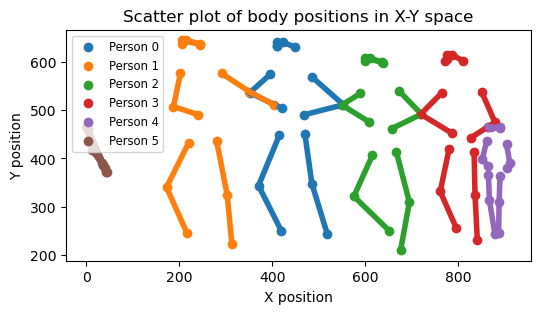

In [27]:
plot_body_positions(data1, figsize=(6,3))

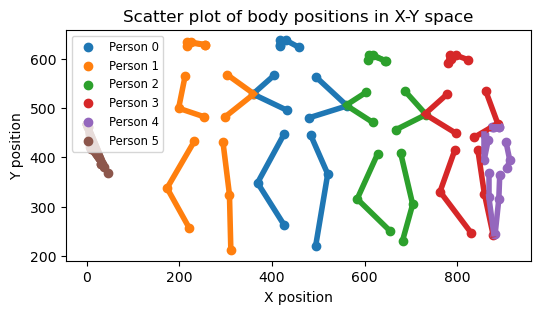

In [28]:
plot_body_positions(data2, figsize=(6,3))